In [1]:
"""
Random Forest for Predicting Stock Price Movement
-------------------------------------------------
This script demonstrates how to:
1. Fetch real stock data from Yahoo Finance using yfinance.
2. Engineer basic features.
3. Label the data to indicate up/down movement for the next day.
4. Train a Random Forest to classify next-day movement.
5. Evaluate the model's performance.
"""

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# 1. Download historical data
# Change the ticker symbol as desired, e.g. 'AAPL', 'TSLA', 'MSFT', etc.
# ticker = "AAPL"
# data = yf.download(ticker, start="2020-01-01", end="2023-01-01")


data = yf.Ticker("AAPL")           # determining which stock will be used
data = data.history(period="max")  # determines period to be used, in this case maximum was determined

data = data.loc["2000-01-01":].copy()

data 


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,0.789884,0.847313,0.765877,0.843077,535796800,0.0,0.0
2000-01-04 00:00:00-05:00,0.815304,0.833191,0.762111,0.771997,512377600,0.0,0.0
2000-01-05 00:00:00-05:00,0.781411,0.832720,0.775762,0.783293,778321600,0.0,0.0
2000-01-06 00:00:00-05:00,0.799299,0.805889,0.715509,0.715509,767972800,0.0,0.0
2000-01-07 00:00:00-05:00,0.726806,0.760699,0.719275,0.749401,460734400,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-15 00:00:00-05:00,234.639999,238.960007,234.429993,237.869995,39832000,0.0,0.0
2025-01-16 00:00:00-05:00,237.350006,238.009995,228.029999,228.259995,71759100,0.0,0.0
2025-01-17 00:00:00-05:00,232.119995,232.289993,228.479996,229.979996,68488300,0.0,0.0


In [34]:
# 2. Basic feature engineering
#    Here we keep it simple: use today's OHLC (Open, High, Low, Close) and Volume.
#    In practice, you might add more sophisticated features (moving averages, RSI, etc.).

data["Tomorrow"] = data["Close"].shift(-1)    # Next day's closing price
data.dropna(inplace=True)  # Remove rows without next-day data

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2000-01-03 00:00:00-05:00    0.789884    0.847313    0.765877    0.843077   
2000-01-04 00:00:00-05:00    0.815304    0.833191    0.762111    0.771997   
2000-01-05 00:00:00-05:00    0.781411    0.832720    0.775762    0.783293   
2000-01-06 00:00:00-05:00    0.799299    0.805889    0.715509    0.715509   
2000-01-07 00:00:00-05:00    0.726806    0.760699    0.719275    0.749401   
...                               ...         ...         ...         ...   
2025-01-14 00:00:00-05:00  234.750000  236.119995  232.470001  233.279999   
2025-01-15 00:00:00-05:00  234.639999  238.960007  234.429993  237.869995   
2025-01-16 00:00:00-05:00  237.350006  238.009995  228.029999  228.259995   
2025-01-17 00:00:00-05:00  232.119995  232.289993  228.479996  229.979996   
2025-01-21 00:00:00-05:00  224.000000  224.419998  219.380005  222.639999   

In [35]:
# 3. Create the target: 1 if next-day close > today's close, else 0
data["Target"] = (data["Tomorrow"] > data["Close"]).astype(int)  

# Prepare feature columns (you can add more technical indicators here)
feature_cols = ["Open", "High", "Low", "Close", "Volume"]
X = data[feature_cols]
y = data["Target"]

In [36]:
# 4. Split into train/test sets
#    We keep 20% of data as a test set to evaluate out-of-sample performance.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# Note: shuffle=False for time-series logic. In many time-series tasks,
# it's crucial to maintain chronological order to avoid data leakage.


In [37]:
# 5. Initialize and train the Random Forest
#    This is a basic configuration. Hyperparameter tuning may improve results.
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [38]:
# 6. Predictions and evaluation
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Random Forest model accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Random Forest model accuracy: 0.4726

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.95      0.63       592
           1       0.53      0.05      0.09       669

    accuracy                           0.47      1261
   macro avg       0.50      0.50      0.36      1261
weighted avg       0.50      0.47      0.34      1261



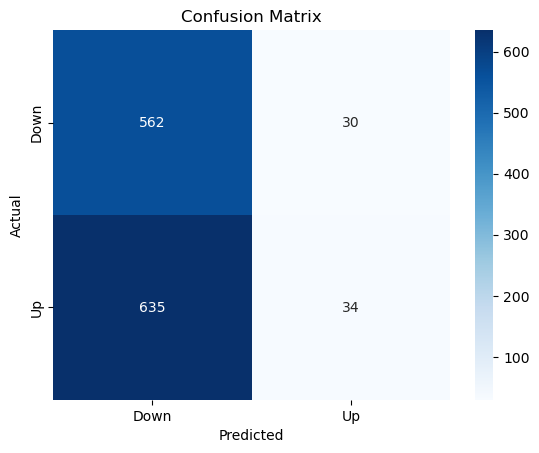

In [39]:
# Confusion Matrix Visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [40]:
# 7. Optional: Check feature importance
importances = rf_model.feature_importances_
for col_name, imp in zip(feature_cols, importances):
    print(f"{col_name} importance: {imp:.4f}")

Open importance: 0.1836
High importance: 0.1895
Low importance: 0.1870
Close importance: 0.2420
Volume importance: 0.1979
